In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

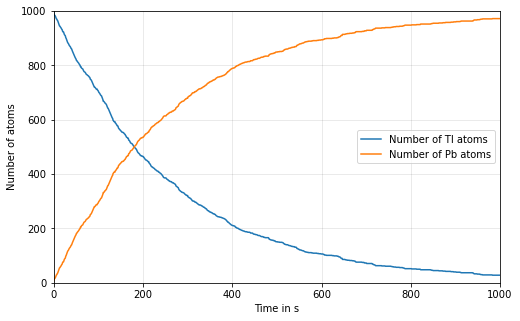

In [3]:
tau = 3.052 * 60
N_Tl = 1000
N_Pb = 0

tstep = 1
maxtime = 1000
time = np.arange(0, maxtime, tstep)
# the timestep is 1, so the t in p(t) is 1
prob = 1 - 2**(-1 / tau)
Tl = np.array([])
Pb = np.array([])
for t in time:
    for atom in range(N_Tl):
        if (np.random.rand() < prob):
            N_Tl -= 1
            N_Pb += 1
    Tl = np.append(Tl, N_Tl)
    Pb = np.append(Pb, N_Pb)
    
plt.figure(figsize=(8, 5))
plt.plot(time, Tl, label="Number of Tl atoms")
plt.plot(time, Pb, label="Number of Pb atoms")
plt.xlabel("Time in s")
plt.ylabel("Number of atoms")
plt.grid(color='k', alpha=0.1)
plt.xlim((0, maxtime))
plt.ylim((0, 1000))
plt.legend()
plt.show()

The distribution to sample from is an exponential,
$$
    p(x) = \mu e^{-\mu x}
$$
with $\mu = \ln(2) / \tau$. `numpy` uses the notation
$$
    p(x) = \frac{1}{\beta} e^{-x / \beta},
$$
so we have to set $\beta = \tau / \ln(2)$.

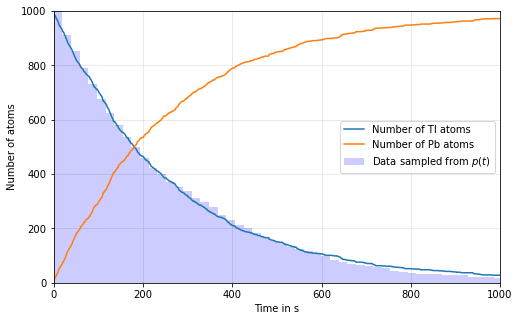

In [4]:
exp_sample = np.random.exponential(tau / np.log(2), size=maxtime)

plt.figure(figsize=(8, 5))
plt.plot(time, Tl, label="Number of Tl atoms")
plt.plot(time, Pb, label="Number of Pb atoms")
plt.hist(exp_sample, bins=100, cumulative=-1, color='b',
         alpha=0.2, label=r"Data sampled from $p(t)$")
plt.xlabel("Time in s")
plt.ylabel("Number of atoms")
plt.grid(color='k', alpha=0.1)
plt.xlim((0, maxtime))
plt.ylim((0, 1000))
plt.legend()
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [5]:
E = 7.7e6
eps0 = 8.8541878128e-12
echrg = 1.602176634e-19
Z = 79
a0 = 5.29177210903e-11
var = (a0 / 100)**2

# beam
X = np.random.multivariate_normal([0, 0], [[0, var], [var, 0]], 1000000)
b = np.sqrt(X[:, 0]**2 + X[:, 1]**2)

theta = 2 * np.arctan(0.5 * Z * echrg / (np.pi * eps0 * E * b))
bounce_back = (theta > 0.5 * np.pi).sum() / len(theta)

print(f"Fraction of particles that bounce back: {bounce_back:.4f}")

Fraction of particles that bounce back: 0.0015


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [7]:
def f(x):
    return np.sin(1 / (x * (2 - x)))**2

N = 1000000
x = np.linspace(1e-6, 2 - 1e-6, N)

I_true = sp.integrate.trapz(f(x), x)

x = 2 * np.random.random(N) # integration is from 0 to 2
y = np.random.random(N) # output is from 0 to 1

I_hm = 2 * (y < f(x)).sum() / N
err_hm = np.abs(I_true - I_hm) / I_true

I_mean = 2 * np.mean(f(x))
err_mean = np.abs(I_true - I_mean) / I_true

print(f"Integral from trapezoidal method: {I_true:.6f}")
print(f"Integral from hit/miss method: {I_hm:.6f}")
print(f"--> Relative error: {err_hm* 100:.5f}%")
print(f"Integral from mean value method: {I_mean:.6f}")
print(f"--> Relative error: {err_mean * 100:.6f}%")

Integral from trapezoidal method: 1.451356
Integral from hit/miss method: 1.450444
--> Relative error: 0.06286%
Integral from mean value method: 1.450693
--> Relative error: 0.045721%


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [8]:
N = 1000000
x = np.random.random(N)
y = np.random.random(N)
# integrate a quarter then multiply by 4
area = 4 * (x**2 + y**2 <= 1).sum() / N
print(f"Area of a circle of unit radius: {area}")
print(f"Relative error: {100 * np.abs(area - np.pi) / np.pi:.4f}%\n")

count = 0
for i in range(N):
    X = np.random.rand(10)
    count += int(np.linalg.norm(X) <= 1)
area = 2**10 * count / N
print(f"Area of 10th dimensional unit sphere: {area}")

Area of a circle of unit radius: 3.142552
Relative error: 0.0305%

Area of 10th dimensional unit sphere: 2.614272


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [9]:
def w(x):
    return 1 / np.sqrt(x)

def inv_w(z):
    return z**2

def f(x):
    return 1 / (np.sqrt(x) * (np.exp(x) + 1))

N = 1000000
x = inv_w(np.random.random(N))
I = 2 * np.sum(f(x) / w(x)) / N

print(I)

0.8391735952550682
